In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Sklearn ML Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate,ShuffleSplit, GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectPercentile
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA

In [83]:
df = pd.read_csv('listings_cleaned.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3582 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3582 non-null   object 
 3   accommodates            3582 non-null   int64  
 4   bathrooms               3582 non-null   float64
 5   instant_bookable        3582 non-null   object 
 6   bedrooms                3582 non-null   float64
 7   bed_type                3582 non-null   object 
 8   beds                    3582 non-null   float64
 9   price                   3582 non-null   float64
 10  cleaning_fee            3582 non-null   float64
 11  availability_365        3582 non-null   int64  
 12  guests_included         3582 non-null   int64  
 13  extra_people            3582 non-null   float64
 14  minimum_nights          3582 non-null   

In [85]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'price', 'cleaning_fee', 'availability_365', 'guests_included',
       'extra_people', 'minimum_nights', 'cancellation_policy',
       'high_end_electronics', 'smoke_detector', 'washing_machine', 'heating',
       'hair_dryer', 'hangers', 'tv', 'kitchen', 'workspace', 'internet',
       'log_price'],
      dtype='object')

In [86]:
df.drop(['price'],axis =1,inplace=True)

In [87]:
features = df.drop(columns='log_price')
target = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 2021)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3582 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3582 non-null   object 
 3   accommodates            3582 non-null   int64  
 4   bathrooms               3582 non-null   float64
 5   instant_bookable        3582 non-null   object 
 6   bedrooms                3582 non-null   float64
 7   bed_type                3582 non-null   object 
 8   beds                    3582 non-null   float64
 9   cleaning_fee            3582 non-null   float64
 10  availability_365        3582 non-null   int64  
 11  guests_included         3582 non-null   int64  
 12  extra_people            3582 non-null   float64
 13  minimum_nights          3582 non-null   int64  
 14  cancellation_policy     3582 non-null   

In [117]:
numeric_features = [ 'accommodates','bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
                    'availability_365', 'guests_included', 'extra_people',
                    'minimum_nights','high_end_electronics','smoke_detector','washing_machine','heating',
                    'hair_dryer', 'hangers', 'tv', 'kitchen','workspace','internet']

categorical_features = ['neighbourhood_cleansed', 
                        'property_type','room_type','bed_type', 
                        'cancellation_policy','instant_bookable']

numeric_transformer = Pipeline([('scaler', StandardScaler())
                               ])

categorical_transformer = Pipeline([('encoder', OneHotEncoder())
                                   ])

preprocessor = ColumnTransformer([
        ('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder = 'passthrough')


In [118]:
### build evaluation function for default

def price_taget(model,train_features, train_target,test_features,test_target):
    vals = dict()
    predictions = model.predict(test_features)
    MAE = mean_absolute_error(test_target, predictions)
    RMSE = np.sqrt(mean_squared_error(test_target, predictions))
    r2 = r2_score(test_target, predictions)
    df_results = pd.DataFrame({'Actual': test_target, 'Predicted': predictions})
    df_results['Residuals'] = (df_results['Actual']) - (df_results['Predicted'])
    plt.figure(figsize=(10,10)),
    sns.scatterplot(x=df_results.index, y=df_results.Residuals, alpha=0.5),
    plt.plot(np.repeat(0,df_results.index.max()), color='darkorange', linestyle='--'),
    plt.xlabel('Fitted Values'),
    plt.ylabel('Residuals')
          
    vals = dict()
    cv = ShuffleSplit(n_splits = 5, random_state=2021)
    val = cross_validate(model, train_features, train_target, cv=cv,
                            scoring=('r2'),
                        return_train_score=True)
    score = pd.DataFrame.from_dict(val, orient='index')
    scores = score.mean(axis=1)
    
    print('Model Performance')
    print(f"MAE: {round(MAE, 3)}")
    print(f"RMSE: {round(RMSE, 3)}")
    print(f"r2 : {round(r2, 3)}")
    vals['MAE'] = MAE
    vals['RMSE'] = RMSE
    vals['R2'] = r2
    print('Cross validation of the model')
    print(scores)
    print('residual data frame')
    print(df_results.head(5))
    vals['score'] = scores
    
    return vals
plt.show()

## 1. Default Parameter 

###  Models used*

The models used in this analysis can be grouped in three different types: (1) **linear models**, (2) **tree-based models** and (3) **clustering-like models**. There is a total of **6 models** used. 

##### **1. Linear models**

- ``LinearRegression`` Analisis Regresi Linear Sederhana – Regresi Linear Sederhana adalah Metode Statistik yang berfungsi untuk menguji sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (X) terhadap Variabel Akibatnya. Faktor Penyebab pada umumnya dilambangkan dengan X atau disebut juga dengan Predictor sedangkan Variabel Akibat dilambangkan dengan Y atau disebut juga dengan Response. Regresi Linear Sederhana atau sering disingkat dengan SLR (Simple Linear Regression) juga merupakan salah satu Metode Statistik yang dipergunakan dalam produksi untuk melakukan peramalan ataupun prediksi tentang karakteristik kualitas maupun Kuantitas.


##### **2. Tree-based models**

- ``DecisionTreeRegressor`` Pohon keputusan membangun model regresi atau klasifikasi dalam bentuk struktur pohon. Ini memecah kumpulan data menjadi himpunan bagian yang lebih kecil dan lebih kecil sementara pada saat yang sama pohon keputusan terkait dikembangkan secara bertahap. Hasil akhirnya adalah pohon dengan simpul keputusan dan simpul daun [2]. Dalam konteks regresi, maka decision tree adalah regresi yang bersifat non-linear dan non-kontinu (diskret). maka ia adalah teknik pengambilan keputusan dengan analogi sebuah pohon memiliki banyak cabang/ akar. Di mana satu cabang akan bercabang lagi, kemudian bercabang lagi, dan seterusnya.

- ``GradientBoostingRegressor`` "Meningkatkan" dalam pembelajaran mesin adalah cara menggabungkan beberapa model sederhana ke dalam satu model komposit. Ini juga mengapa penguat dikenal sebagai model aditif, karena model sederhana (juga dikenal sebagai pembelajar lemah) ditambahkan satu per satu, sambil mempertahankan struktur yang ada dalam model tidak berubah. Saat kami menggabungkan semakin banyak model sederhana, model akhir yang lengkap menjadi prediktor yang lebih kuat. Istilah "gradien" dalam "peningkatan gradien" berasal dari fakta bahwa algoritme menggunakan penurunan gradien untuk meminimalkan kerugian.

- ``RandomForestRegressor`` Random forests or random decision forests are metode pembelajaran ansambel untuk klasifikasi, regresi, dan tugas lain yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan dan mengeluarkan kelas yang merupakan mode kelas (klasifikasi) atau prediksi rata-rata / rata-rata ( regresi) dari masing-masing pohon.

- ``XGBRegressor`` XGBoost adalah singkatan dari "Extreme Gradient Boosting", di mana istilah "Gradient Boosting" berasal dari kertas Pendekatan Fungsi Greedy: A Gradient Boosting Machine, oleh Friedman. XGBoost digunakan untuk masalah pembelajaran yang diawasi, di mana kami menggunakan data pelatihan (dengan beberapa fitur) $ x_i $ untuk memprediksi variabel target $ y_i $ [4].

##### **3. Clustering-like models**

- ``KNeighborsRegressor`` Regression based on *k-nearest neighbors*. Target diprediksi dengan interpolasi lokal dari target yang terkait dengan tetangga terdekat dalam set pelatihan.

### *5.2.2. Metrics choosed to validate the models*

In order to determine wether a model is good at making predictions for a given dataset, it is neccesary to evaluate it with some metrics. These metrics usually describe the error in the predictions. In this analysis, the metrics used to evaluate the regression models are:

- **Root Mean Squared Error (RMSE)** - RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. 

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{j = 1}^n (y_j - \hat{y}_j)^2}$$



- **Mean Absolute Error (MAE)** - Measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

$$\text{MAE} = \frac{1}{n}\sum_{j = 1}^n |y_j - \hat{y}_j|$$


- **$R^2$** - Proportion of the variance in the dependent variable that is predictable from the independent variable(s).


#### ``LinearRegression``

In [119]:
df.head(1)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,cleaning_fee,...,smoke_detector,washing_machine,heating,hair_dryer,hangers,tv,kitchen,workspace,internet,log_price
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,35.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.525453


Model Performance
MAE: 0.266
RMSE: 0.358
r2 : 0.696
Cross validation of the model
fit_time       0.036417
score_time     0.012846
test_score     0.604645
train_score    0.683030
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.293457  -0.128671
2903  4.189655   4.289062  -0.099408
893   3.931826   4.215820  -0.283995
483   3.931826   4.090820  -0.158995
2448  4.499810   4.678711  -0.178901


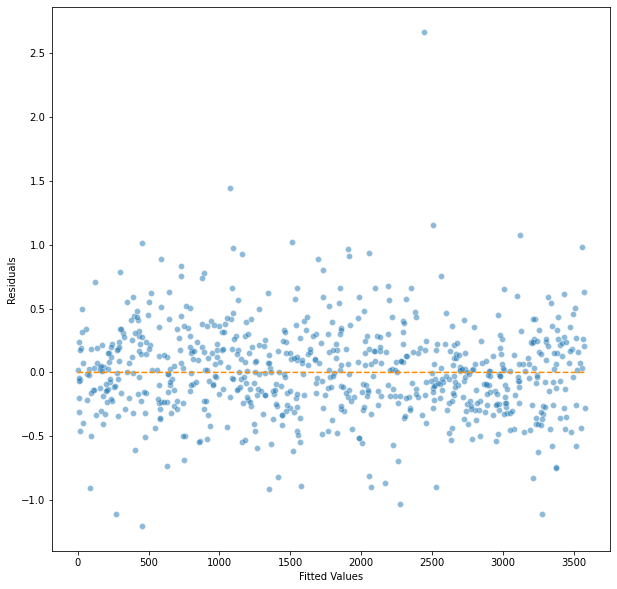

In [120]:
linreg = LinearRegression()
linreg_pipe = Pipeline([
    ('preprocessor',preprocessor),
      ('linear_regression',linreg)])
linreg_pipe.fit(X_train, y_train)
linreg_acc = price_taget(linreg_pipe,X_train,y_train,X_test,y_test)

#### ``DecisionTreeRegressor``

Model Performance
MAE: 0.353
RMSE: 0.537
r2 : 0.315
Cross validation of the model
fit_time       0.048456
score_time     0.008276
test_score     0.287752
train_score    0.998740
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.170484  -0.005698
2903  4.189655   4.189655   0.000000
893   3.931826   4.356709  -0.424883
483   3.931826   4.510860  -0.579034
2448  4.499810   4.820282  -0.320472


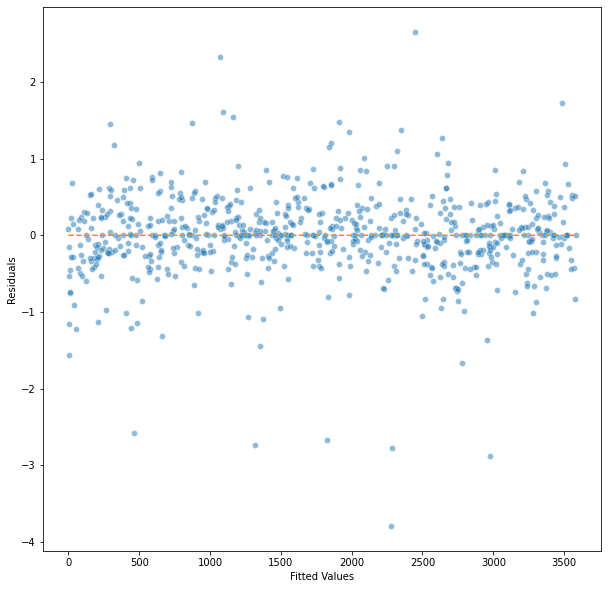

In [121]:
dtr = DecisionTreeRegressor()
dtr_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('tree', dtr)])
dtr_pipe.fit(X_train, y_train)
dtr_acc = price_taget(dtr_pipe,X_train,y_train,X_test,y_test)

Model Performance
MAE: 0.253
RMSE: 0.339
r2 : 0.728
Cross validation of the model
fit_time       0.483897
score_time     0.009030
test_score     0.631627
train_score    0.752724
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.194545  -0.029759
2903  4.189655   4.286242  -0.096587
893   3.931826   4.353334  -0.421508
483   3.931826   4.222887  -0.291061
2448  4.499810   4.453149   0.046661


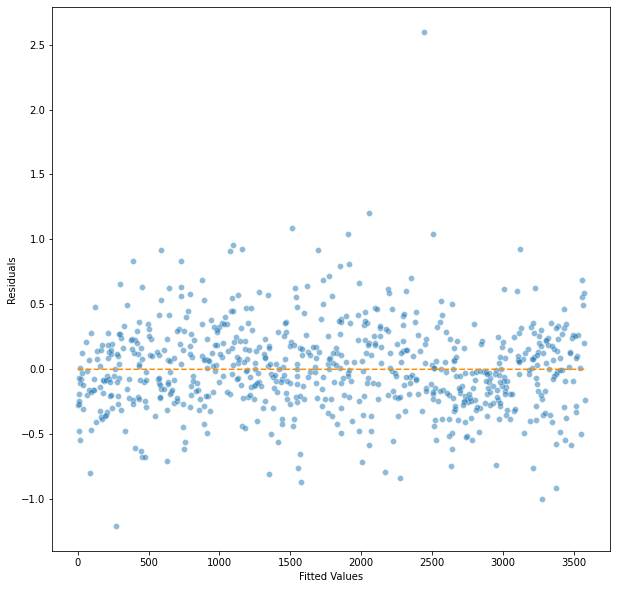

In [122]:
gbr = GradientBoostingRegressor()
gbr_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('boost',gbr)])
gbr_pipe.fit(X_train, y_train)
gbr_acc  = price_taget(gbr_pipe, X_train, y_train,X_test, y_test)

#### ``RandomForestRegressor``

Model Performance
MAE: 0.238
RMSE: 0.335
r2 : 0.734
Cross validation of the model
fit_time       1.905215
score_time     0.021841
test_score     0.627430
train_score    0.956190
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.316121  -0.151335
2903  4.189655   4.182758   0.006897
893   3.931826   4.276937  -0.345111
483   3.931826   4.133547  -0.201721
2448  4.499810   4.531533  -0.031724


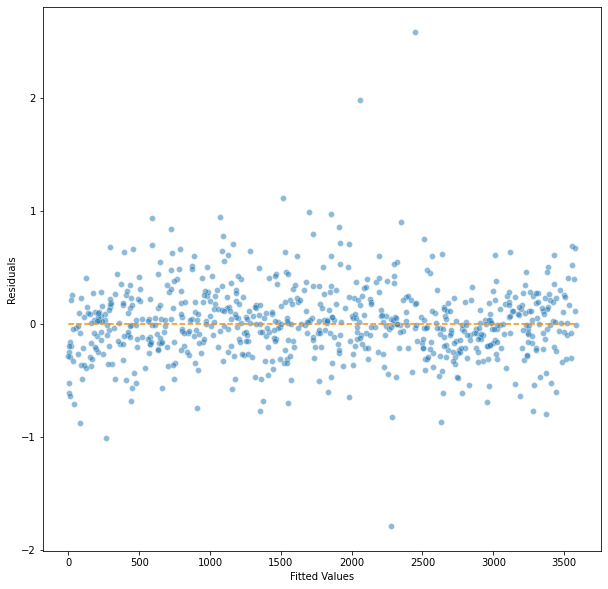

In [123]:
rfr = RandomForestRegressor()
rfr_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('random_forest',rfr)])
rfr_pipe.fit(X_train, y_train)
rfr_acc = price_taget(rfr_pipe, X_train, y_train, X_test, y_test)

#### ``XGBRegressor``

Model Performance
MAE: 0.245
RMSE: 0.351
r2 : 0.708
Cross validation of the model
fit_time       0.569405
score_time     0.013169
test_score     0.631535
train_score    0.956164
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.279459  -0.114674
2903  4.189655   4.214297  -0.024643
893   3.931826   5.144304  -1.212478
483   3.931826   4.175972  -0.244146
2448  4.499810   4.592285  -0.092475


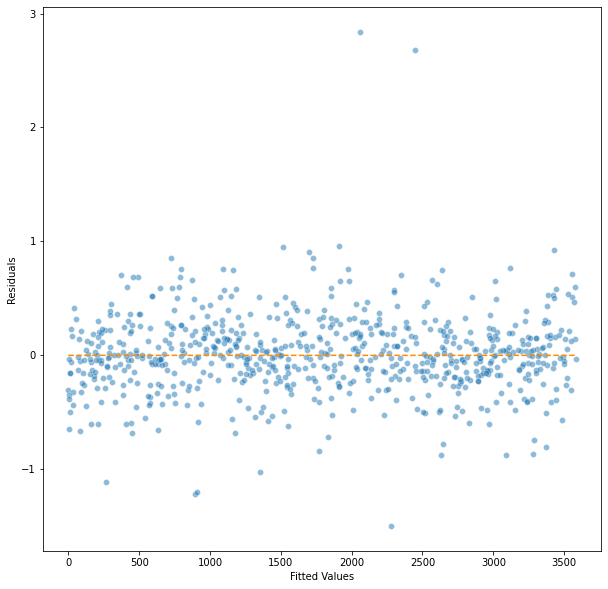

In [124]:
xgb = XGBRegressor()
xgb_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('boost',xgb)])
xgb_pipe.fit(X_train, y_train)
xgb_acc = price_taget(xgb_pipe,X_train, y_train, X_test, y_test)

#### ``KNeighborsRegressor``

Model Performance
MAE: 0.315
RMSE: 0.432
r2 : 0.558
Cross validation of the model
fit_time       0.022390
score_time     0.026933
test_score     0.490329
train_score    0.694226
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.035858   0.128928
2903  4.189655   4.295825  -0.106170
893   3.931826   4.364192  -0.432366
483   3.931826   5.002658  -1.070833
2448  4.499810   4.569381  -0.069571


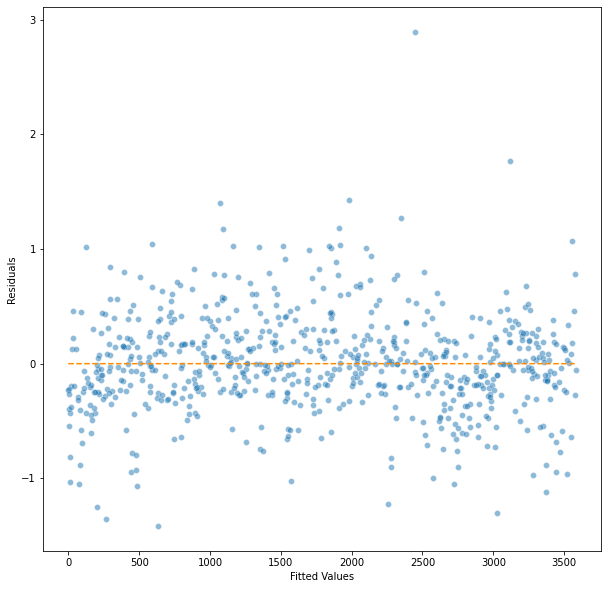

In [125]:
knr = KNeighborsRegressor()
knr_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('KNR',knr)])
knr_pipe.fit(X_train, y_train)
knr_acc = price_taget(knr_pipe, X_train, y_train,X_test, y_test)

### Result

In [126]:
score_list_1 = [linreg_acc['score'], dtr_acc['score'], gbr_acc['score'],
            rfr_acc['score'],xgb_acc['score'],knr_acc['score']]

mae_list_1 = [linreg_acc['MAE'], dtr_acc['MAE'],gbr_acc['MAE'],
            rfr_acc['MAE'],xgb_acc['MAE'],knr_acc['MAE']]

rmse_list_1 = [linreg_acc['RMSE'], dtr_acc['RMSE'], gbr_acc['RMSE'],
            rfr_acc['RMSE'],xgb_acc['RMSE'],knr_acc['RMSE']]

r2_list_1 = [linreg_acc['R2'], dtr_acc['R2'],gbr_acc['R2'],
            rfr_acc['R2'], xgb_acc['R2'],knr_acc['R2']]

best_model_1 = pd.DataFrame({'MAE':mae_list_1,'RMSE':rmse_list_1,'R2':r2_list_1}, 
                          index ='LinearRegression DisicionTree GradienBoost RandomForest  XGBoost KNeighborsRegressor'.split(),
                        )
best_score_val_1 = pd.DataFrame(data = score_list_1, 
                          index ='LinearRegression DisicionTree GradienBoost RandomForest XGBoost KNeighborsRegressor'.split(),
                        )
best_result_1 = pd.concat([best_model_1, best_score_val_1], axis=1)
best_result_1.drop(['fit_time','score_time'],axis=1, inplace=True)
best_result_1 = round(best_result_1,2)
best_result_1

,MAE,RMSE,R2,test_score,train_score
LinearRegression,0.27,0.36,0.70,0.60,0.68
DisicionTree,0.35,0.54,0.31,0.29,1.00
GradienBoost,0.25,0.34,0.73,0.63,0.75
RandomForest,0.24,0.33,0.73,0.63,0.96
XGBoost,0.24,0.35,0.71,0.63,0.96
KNeighborsRegressor,0.31,0.43,0.56,0.49,0.69


## 2. base model with feature selection

#### ``LinearRegression``

Model Performance
MAE: 0.281
RMSE: 0.376
r2 : 0.665
Cross validation of the model
fit_time       0.088706
score_time     0.010903
test_score     0.582232
train_score    0.639242
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.384277  -0.219491
2903  4.189655   4.195801  -0.006146
893   3.931826   4.233398  -0.301573
483   3.931826   4.229492  -0.297667
2448  4.499810   4.629395  -0.129585


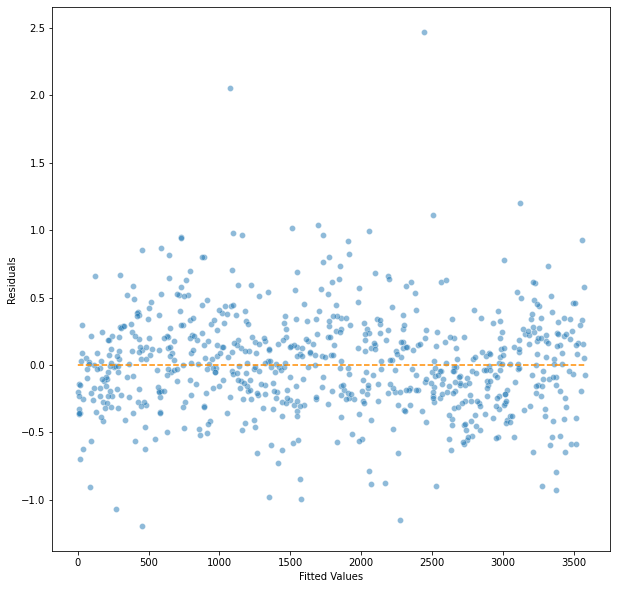

In [127]:
linreg2 = LinearRegression()
linreg2_pipe = Pipeline([('preprocessor',preprocessor),
                         ('percen', SelectPercentile(percentile=50)),
                         ('linear_regression',linreg2)
                        ])
linreg2_pipe.fit(X_train, y_train)
linreg_acc2 = price_taget(linreg2_pipe,X_train,y_train,X_test,y_test)

#### ``DecisionTreeRegressor``

Model Performance
MAE: 0.338
RMSE: 0.504
r2 : 0.397
Cross validation of the model
fit_time       0.082192
score_time     0.008891
test_score     0.298604
train_score    0.986202
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.707110  -0.542324
2903  4.189655   4.369448  -0.179793
893   3.931826   4.454347  -0.522522
483   3.931826   3.526361   0.405465
2448  4.499810   4.709530  -0.209721


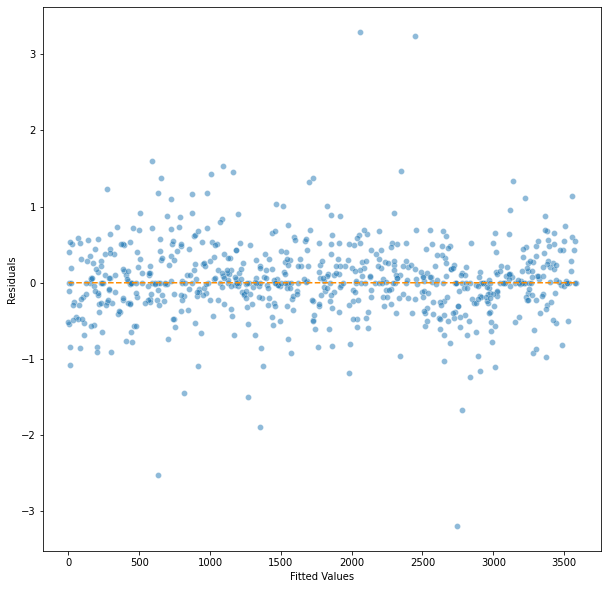

In [128]:
dtr2 = DecisionTreeRegressor()
dtr2_pipe = Pipeline([('preprocessor', preprocessor),
                      ('percen', SelectPercentile(percentile=50)),
                       ('tree', dtr2)
                     ])
dtr2_pipe.fit(X_train, y_train)
dtr_acc2 = price_taget(dtr2_pipe,X_train,y_train,X_test,y_test)

#### ``GradientBoostingRegressor``

Model Performance
MAE: 0.26
RMSE: 0.347
r2 : 0.715
Cross validation of the model
fit_time       0.316110
score_time     0.009297
test_score     0.617345
train_score    0.719249
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.251350  -0.086565
2903  4.189655   4.224782  -0.035127
893   3.931826   4.288005  -0.356179
483   3.931826   4.179302  -0.247477
2448  4.499810   4.424330   0.075480


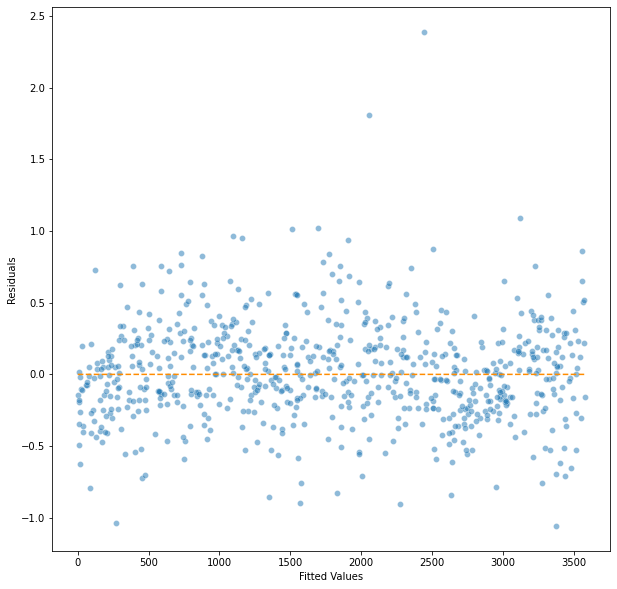

In [129]:
gbr2 = GradientBoostingRegressor()
gbr2_pipe = Pipeline([('preprocessor', preprocessor),
                     ('percen', SelectPercentile(percentile=50)),
                     ('boost',gbr2)
                     ])
gbr2_pipe.fit(X_train, y_train)
gbr_acc2 = price_taget(gbr2_pipe, X_train, y_train,X_test, y_test)

#### ``RandomForestRegressor``

Model Performance
MAE: 0.262
RMSE: 0.372
r2 : 0.672
Cross validation of the model
fit_time       1.120128
score_time     0.020334
test_score     0.597206
train_score    0.941678
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.375379  -0.210593
2903  4.189655   4.167579   0.022076
893   3.931826   4.278957  -0.347132
483   3.931826   4.801002  -0.869176
2448  4.499810   4.343984   0.155825


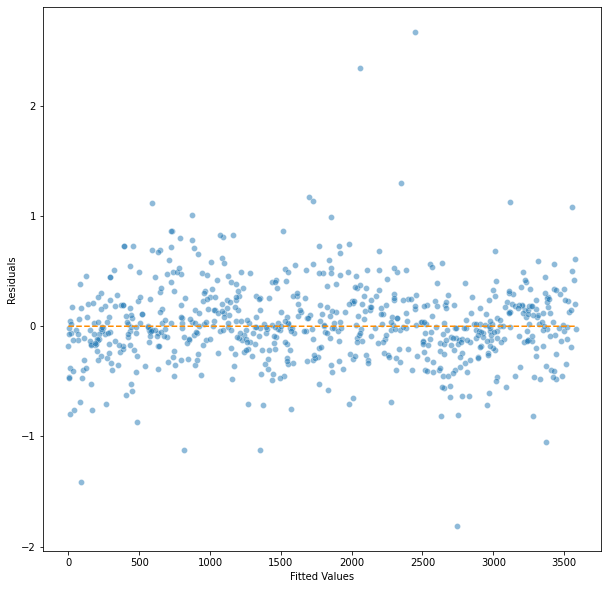

In [130]:
rfr2 = RandomForestRegressor()
rfr2_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('percen', SelectPercentile(percentile=50)),
     ('random_forest',rfr2)
    ])
rfr2_pipe.fit(X_train, y_train)
rfr_acc2 = price_taget(rfr2_pipe, X_train, y_train, X_test, y_test)

#### ``XGBRegressor``

Model Performance
MAE: 0.258
RMSE: 0.366
r2 : 0.682
Cross validation of the model
fit_time       0.446532
score_time     0.013168
test_score     0.604973
train_score    0.911974
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.329806  -0.165020
2903  4.189655   4.123876   0.065779
893   3.931826   4.329414  -0.397589
483   3.931826   4.375383  -0.443557
2448  4.499810   4.248590   0.251220


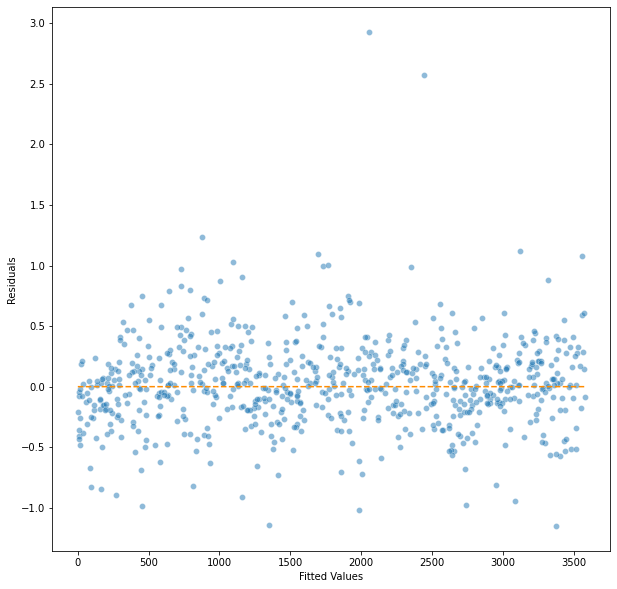

In [131]:
xgb2 = XGBRegressor()
xgb2_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('percen', SelectPercentile(percentile=50)),
     ('boost',xgb2)
    ])
xgb2_pipe.fit(X_train, y_train)
xgb_acc2 = price_taget(xgb2_pipe,X_train, y_train, X_test, y_test)

#### ``KNeighborsRegressor``

Model Performance
MAE: 0.295
RMSE: 0.409
r2 : 0.602
Cross validation of the model
fit_time       0.074174
score_time     0.023179
test_score     0.491076
train_score    0.693274
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.148344   0.016442
2903  4.189655   4.484932  -0.295277
893   3.931826   4.141641  -0.209815
483   3.931826   4.990688  -1.058862
2448  4.499810   4.422291   0.077518


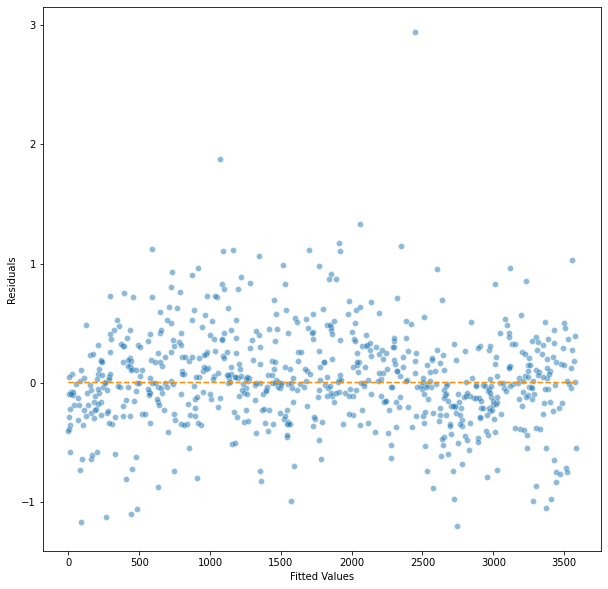

In [132]:
knr2 = KNeighborsRegressor()
knr2_pipe = Pipeline([('preprocessor', preprocessor),
                      ('percen', SelectPercentile(percentile=50)),
                     ('KNR',knr2),
                     ])
knr2_pipe.fit(X_train, y_train)
knr_acc2 = price_taget(knr2_pipe, X_train, y_train,X_test, y_test)

### Best Tune Model with Feature Selection

In [133]:
score_list_2 = [linreg_acc2['score'], dtr_acc2['score'],gbr_acc2['score'],
            rfr_acc2['score'], xgb_acc2['score'],knr_acc2['score']]

mae_list_2 = [linreg_acc2['MAE'], dtr_acc2['MAE'],gbr_acc2['MAE'],
            rfr_acc2['MAE'],xgb_acc2['MAE'],knr_acc2['MAE']]

rmse_list_2 = [linreg_acc2['RMSE'], dtr_acc2['RMSE'],gbr_acc2['RMSE'],
            rfr_acc2['RMSE'],xgb_acc2['RMSE'],knr_acc2['RMSE']]

r2_list_2 = [linreg_acc2['R2'], dtr_acc2['R2'],gbr_acc2['R2'],
            rfr_acc2['R2'],xgb_acc2['R2'],knr_acc2['R2']]

best_model_2 = pd.DataFrame({'MAE':mae_list_2,'RMSE':rmse_list_2,'R2':r2_list_2}, 
                          index ='LinearRegression DisicionTree GradienBoost RandomForest  XGBoost KNeighborsRegressor'.split(),
                        )
best_score_val_2 = pd.DataFrame(data = score_list_2, 
                          index ='LinearRegression DisicionTree GradienBoost RandomForest XGBoost KNeighborsRegressor'.split(),
                        )
best_result_2 = pd.concat([best_model_2, best_score_val_2], axis=1)
best_result_2.drop(['fit_time','score_time'],axis=1, inplace=True)
best_result_2 = round(best_result_2,2)
best_result_2

,MAE,RMSE,R2,test_score,train_score
LinearRegression,0.28,0.38,0.67,0.58,0.64
DisicionTree,0.34,0.50,0.40,0.30,0.99
GradienBoost,0.26,0.35,0.71,0.62,0.72
RandomForest,0.26,0.37,0.67,0.60,0.94
XGBoost,0.26,0.37,0.68,0.60,0.91
KNeighborsRegressor,0.30,0.41,0.60,0.49,0.69


###  Feature Selection and TUNED

saya pilih 3 terbaik **gradienboost,RandomForest,Xgboost**

#### ``GradientBoostingRegressorTune``

In [134]:
gbr3 = GradientBoostingRegressor()
gbr3_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('percen', SelectPercentile(percentile=50)),
     ('boost',gbr3)])
gbr3_pipe.fit(X_train, y_train)
gbr3_param = {'boost__loss': ['ls', 'huber'], 'boost__criterion': ['mse', 'mae']}
gbr3_grid_search = GridSearchCV(gbr3_pipe, gbr3_param,scoring = 'r2', n_jobs=-1,verbose=1)
gbr3_grid_search.fit(X_train, y_train)
print(gbr3_grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'boost__criterion': 'mse', 'boost__loss': 'ls'}


Model Performance
MAE: 0.26
RMSE: 0.347
r2 : 0.714
Cross validation of the model
fit_time       0.165301
score_time     0.008043
test_score     0.964230
train_score    0.987483
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.251350  -0.086565
2903  4.189655   4.224782  -0.035127
893   3.931826   4.288005  -0.356179
483   3.931826   4.179302  -0.247477
2448  4.499810   4.424330   0.075480


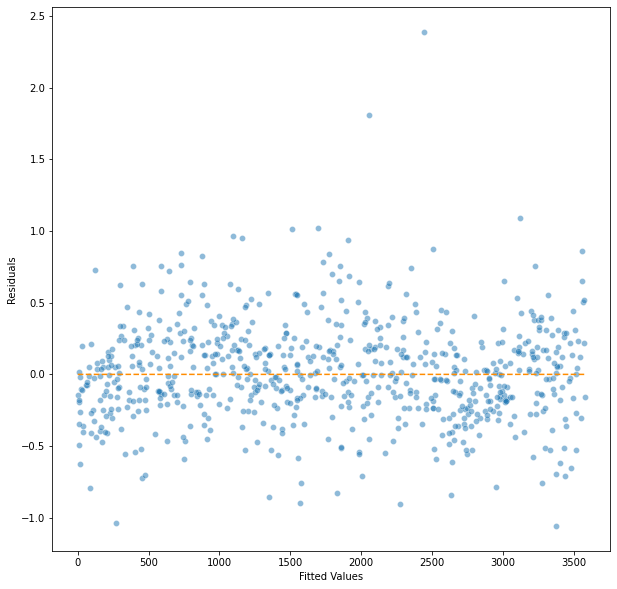

In [135]:
gbr3_tuned = gbr3_grid_search.best_estimator_.fit(X_train, y_train)
y_pred_gbr3 = gbr3_tuned.predict(X_test)
X_pred_gbr3 = X_test
gbr_grid_acc3 = price_taget(gbr3_tuned, X_pred_gbr3, y_pred_gbr3, X_test, y_test)

#### ``RandomForestRegressorTune``

In [136]:
rfr3 = RandomForestRegressor()
rfr3_pipe = Pipeline([('preprocessor', preprocessor),
     ('percen', SelectPercentile(percentile=50)),
     ('random_forest',rfr3)])
rfr3_pipe.fit(X_train, y_train)

rfr3_param = {'random_forest__n_estimators' : [100, 150, 200],
                        'random_forest__bootstrap' : [True,False],
                        'random_forest__min_samples_split' : [2,5,8,10,12]}

rfr3_grid_search = GridSearchCV(rfr3_pipe, rfr3_param, scoring ='r2',n_jobs=-1,verbose=1)
rfr3_grid_search.fit(X_train, y_train)
print(rfr3_grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'random_forest__bootstrap': True, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}


Model Performance
MAE: 0.258
RMSE: 0.366
r2 : 0.682
Cross validation of the model
fit_time       0.223623
score_time     0.005861
test_score     0.809076
train_score    0.966480
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   5.294565  -0.129779
2903  4.189655   4.165377   0.024278
893   3.931826   4.239268  -0.307442
483   3.931826   4.971465  -1.039639
2448  4.499810   4.424907   0.074903


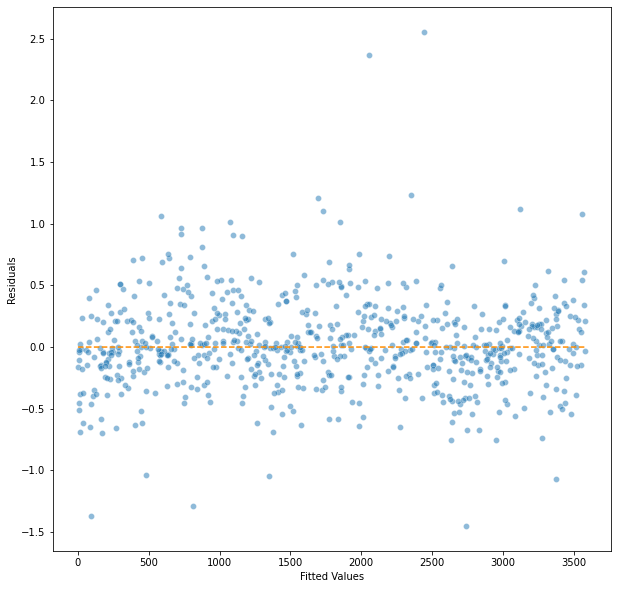

In [137]:
rfr3_tuned = rfr3_grid_search.best_estimator_.fit(X_train, y_train)
y_pred_rfr3 = rfr3_tuned.predict(X_test)
X_pred_rfr3 = X_test
rfr_grid_acc3 = price_taget(rfr3_tuned, X_pred_rfr3, y_pred_rfr3, X_test, y_test)

#### ``XGBRegressorTune``

In [138]:
xgb3 = XGBRegressor()
xgb3_pipe = Pipeline(
    [('preprocessor', preprocessor),
     ('percen', SelectPercentile(percentile=50)),
     ('boost',xgb3)])
xgb3_pipe.fit(X_train, y_train)
xgb3_param = {'boost__n_estimators': [100, 150, 200],
              'boost__learning_rate': [0.01, 0.05, 0.1], 
              'boost__max_depth': [3, 4, 5, 6, 7],
              'boost__colsample_bytree': [0.6, 0.7, 1],
              'boost__gamma': [0.0, 0.1, 0.2]}
xgb3_grid_search = GridSearchCV(xgb3_pipe, xgb3_param, scoring ='r2', n_jobs=-1,verbose=1)
xgb3_grid_search.fit(X_train, y_train)
print(xgb3_grid_search.best_params_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
{'boost__colsample_bytree': 0.6, 'boost__gamma': 0.0, 'boost__learning_rate': 0.01, 'boost__max_depth': 3, 'boost__n_estimators': 100}


Model Performance
MAE: 1.636
RMSE: 1.699
r2 : -5.846
Cross validation of the model
fit_time        0.134734
score_time      0.010880
test_score    -15.268125
train_score   -12.057567
dtype: float64
residual data frame
        Actual  Predicted  Residuals
1271  5.164786   3.429237   1.735549
2903  4.189655   3.016059   1.173596
893   3.931826   2.936239   0.995586
483   3.931826   2.902355   1.029471
2448  4.499810   2.997295   1.502515


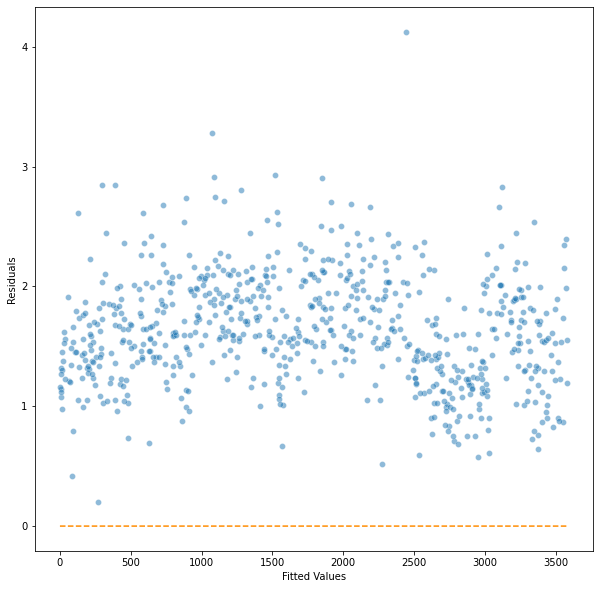

In [139]:
xgb3_tuned = xgb3_grid_search.best_estimator_.fit(X_train, y_train)
y_pred_xgb3 = xgb3_tuned.predict(X_test)
X_pred_xgb3 = X_test
xgb_grid_acc3 = price_taget(xgb3_tuned, X_pred_xgb3, y_pred_xgb3, X_test, y_test)

 ### score all features and hyperparameter

In [140]:
score_list_3 = [rfr_grid_acc3['score'], gbr_grid_acc3['score'],xgb_grid_acc3['score']]

mae_list_3 = [rfr_grid_acc3['MAE'], gbr_grid_acc3['MAE'],xgb_grid_acc3['MAE']]

rmse_list_3 = [rfr_grid_acc3['RMSE'], gbr_grid_acc3['RMSE'],xgb_grid_acc3['RMSE']]

r2_list_3 = [rfr_grid_acc3['R2'], gbr_grid_acc3['R2'],xgb_grid_acc3['R2']]

best_model_3 = pd.DataFrame({'MAE':mae_list_3,'RMSE':rmse_list_3,'R2':r2_list_3}, 
                          index ='RandomForest GradienBoost XGBoost'.split(),
                        )
best_score_val_3 = pd.DataFrame(data = score_list_3, 
                          index ='RandomForest GradienBoost XGBoost'.split(),
                        )
best_result_3 = pd.concat([best_model_3, best_score_val_3], axis=1)
best_result_3.drop(['fit_time','score_time'],axis=1, inplace=True)
best_result_3 = round(best_result_3,2)
best_result_3

,MAE,RMSE,R2,test_score,train_score
RandomForest,0.26,0.37,0.68,0.81,0.97
GradienBoost,0.26,0.35,0.71,0.96,0.99
XGBoost,1.64,1.70,-5.85,-15.27,-12.06


Uji Statistik R2 (Koefisien Determinasi)
Nilai R2 menunjukan persentase variabel tak bebas dapat dijelaskan oleh variabel bebas. Semakin tinggi nilai R2 maka semakin baik model karena semakin besar keragaman peubah dependen yang dapat dijelaskan oleh peubah independen. Perhitungan R2 dapat dilakukan dengan mengikuti rumus : 0 ≤ R2 ≤ 1 Dimana : ESS = Error Sum Square atau Jumlah Kuadrat Galat RSS = Regression Sum Square atau Jumlah Kuadrat Regresi TSS = Total Sum Square atau Jumlah Kuadrat Total = Variabel pengganggu (error term) dari model yang diestimasi Variabel dependen = Variabel dependen rata-rata

dengan mempertimbangkan score R^2 terhadap data, 
terlihat bahwa **GradientBoost** pada ekperimen yang saya buat dalam semua fitur yang dipilih adalah yang paling mendekati 1 dan eror mendekati 0 dengan score sebelum di validasi **0,71** sedangkan setelah di validasi score nya adalah 
score test **0,96** dan score training **0.99**. 

## DEPLOYMENT

In [141]:
import joblib

In [142]:
joblib.dump(gbr3_pipe,'GBR_TUNED')

['GBR_TUNED']

In [143]:

pd.set_option('display.max_columns', 500)
df.head(1)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,cleaning_fee,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy,high_end_electronics,smoke_detector,washing_machine,heating,hair_dryer,hangers,tv,kitchen,workspace,internet,log_price
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,35.0,0,1,0.0,2,moderate,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.525453


In [144]:
df['price'] = np.expm1(df['log_price'])

In [145]:
df.drop(['log_price'],axis=1,inplace=True)

In [146]:
df.head(1)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,cleaning_fee,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy,high_end_electronics,smoke_detector,washing_machine,heating,hair_dryer,hangers,tv,kitchen,workspace,internet,price
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,35.0,0,1,0.0,2,moderate,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,250.0


In [147]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'cleaning_fee', 'availability_365', 'guests_included', 'extra_people',
       'minimum_nights', 'cancellation_policy', 'high_end_electronics',
       'smoke_detector', 'washing_machine', 'heating', 'hair_dryer', 'hangers',
       'tv', 'kitchen', 'workspace', 'internet', 'price'],
      dtype='object')

In [167]:
databaru = [{'neighbourhood_cleansed':'Roslindale', 
            'property_type':'House', 
            'room_type':'Entire home/apt', 
            'accommodates':1,
            'bathrooms':2, 
            'instant_bookable':'t', 
            'bedrooms':3, 
            'bed_type':'Real Bed', 
            'beds': 4,
            'cleaning_fee':20, 
            'availability_365':365, 
            'guests_included':2, 
            'extra_people':2, 
            'minimum_nights':30, 
            'cancellation_policy':'moderate',
            'high_end_electronics':1, 
            'smoke_detector':0, 
            'washing_machine':1, 
            'heating':1, 
            'hair_dryer':0,
            'hangers':1,
            'tv':1,
            'kitchen':1, 
            'workspace':1,  
            'internet':0, 
                }]
            

In [168]:
percobaan_1 =pd.DataFrame(databaru,index=[1])
percobaan_1

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,cleaning_fee,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy,high_end_electronics,smoke_detector,washing_machine,heating,hair_dryer,hangers,tv,kitchen,workspace,internet
1,Roslindale,House,Entire home/apt,1,2,t,3,Real Bed,4,20,365,2,2,30,moderate,1,0,1,1,0,1,1,1,1,0


In [169]:
model = joblib.load('GBR_TUNED')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'cleaning_fee',
                                                   'availability_365',
                                                   'guests_included',
                                                   'extra_people',
                                                   'minimum_nights',
                                                   'high_end_electronics',
                                                   'smoke_detector',
                                              

In [170]:
pred = model.predict(percobaan_1)

In [171]:
print("your expected price is S$",(np.expm1(pred)[0]).round(2))

your expected price is S$ 135.17


In [154]:
df.to_csv('listings_FINAL.csv', index=False)